In [5]:
import pandas as pd
import numpy as np

In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data=pd.read_csv('customer_segmentation.csv')

In [9]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [10]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [11]:
data.shape

(2240, 29)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [13]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [14]:
data=data.dropna()

In [15]:
data.isnull().sum().sum()

0

In [16]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [17]:
data["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [18]:
data["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Data Cleaning and feature engineering


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [20]:
data["Dt_Customer"]=pd.to_datetime(data["Dt_Customer"], dayfirst=True)

In [21]:
data["Age"]=2025-data["Year_Birth"]

In [22]:
data["Total_Children"]=data["Kidhome"]+data["Teenhome"]
data["Total_Children"].reset_index()

,index,Total_Children
0,0,0
1,1,2
2,2,0
3,3,1
4,4,1
...,...,...
2211,2235,1
2212,2236,3
2213,2237,0
2214,2238,1


In [23]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children'],
      dtype='object')

In [24]:
spend=["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
data["Total_spending"]=data[spend].sum(axis=1)
data["Total_spending"].reset_index()

,index,Total_spending
0,0,1617
1,1,27
2,2,776
3,3,53
4,4,422
...,...,...
2211,2235,1341
2212,2236,444
2213,2237,1241
2214,2238,843


In [25]:
data["Customer_Since"]= (pd.Timestamp("today") - data["Dt_Customer"]).dt.days

In [26]:
data["Customer_Since"]

0       4890
1       4340
2       4539
3       4366
4       4388
        ... 
2235    4608
2236    4246
2237    4382
2238    4383
2239    4849
Name: Customer_Since, Length: 2216, dtype: int64

EDA


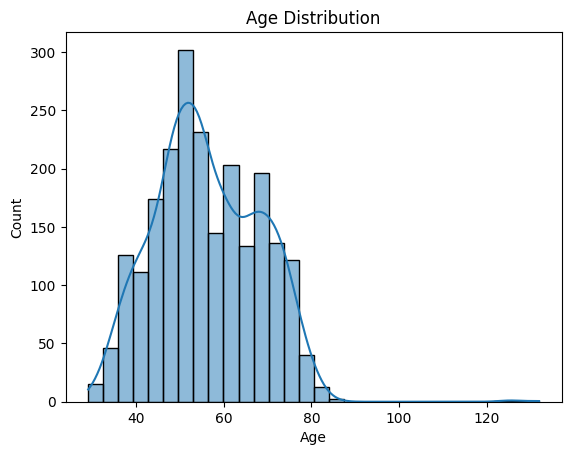

In [27]:
sns.histplot(data["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

In [28]:
data["Age"].describe()

count    2216.000000
mean       56.179603
std        11.985554
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max       132.000000
Name: Age, dtype: float64

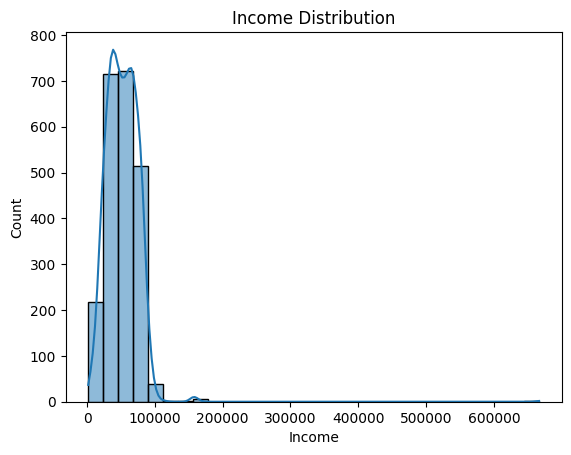

In [29]:
sns.histplot(data["Income"], bins=30, kde=True)
plt.title("Income Distribution")
plt.show()

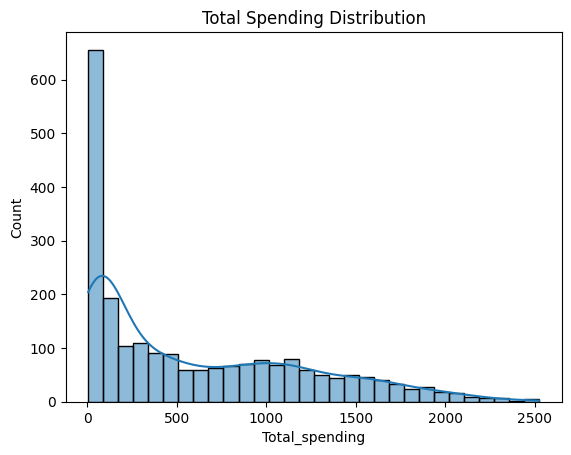

In [30]:
sns.histplot(data["Total_spending"], bins=30, kde=True)
plt.title("Total Spending Distribution")
plt.show()

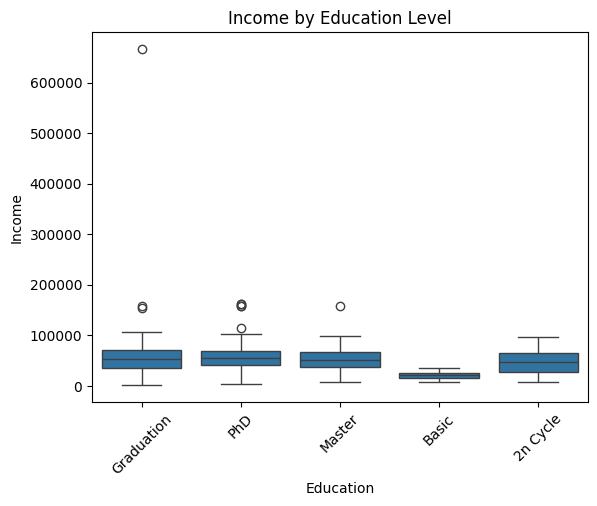

In [31]:
sns.boxplot(x="Education", y="Income", data=data)
plt.xticks(rotation=45)
plt.title("Income by Education Level")
plt.show()

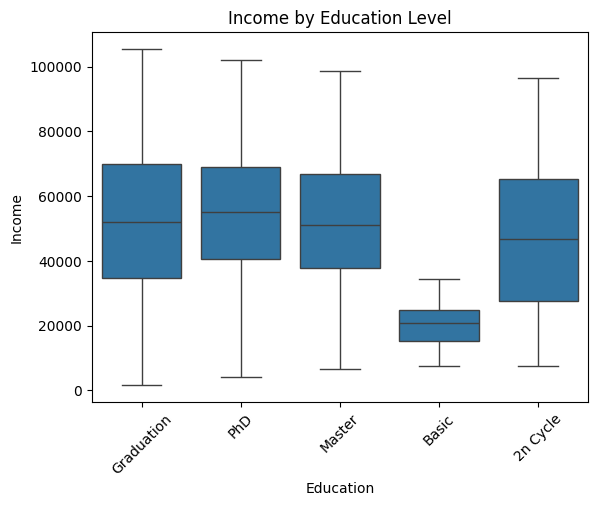

In [82]:
sns.boxplot(x="Education", y="Income", data=data, showfliers=False)
plt.xticks(rotation=45)
plt.title("Income by Education Level")
plt.show()

In [32]:
data.groupby("Education")["Income"].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
2n Cycle,200.0,47633.190000,22119.081838,7500.0,27526.50,46805.0,65393.25,96547.0
Basic,54.0,20306.259259,6235.066773,7500.0,15405.25,20744.0,24882.00,34445.0
Graduation,1116.0,52720.373656,28177.192681,1730.0,34834.50,52028.5,69930.50,666666.0
Master,365.0,52917.534247,20157.788029,6560.0,37760.00,50943.0,66726.00,157733.0
PhD,481.0,56145.313929,20612.979997,4023.0,40451.00,55212.0,69098.00,162397.0


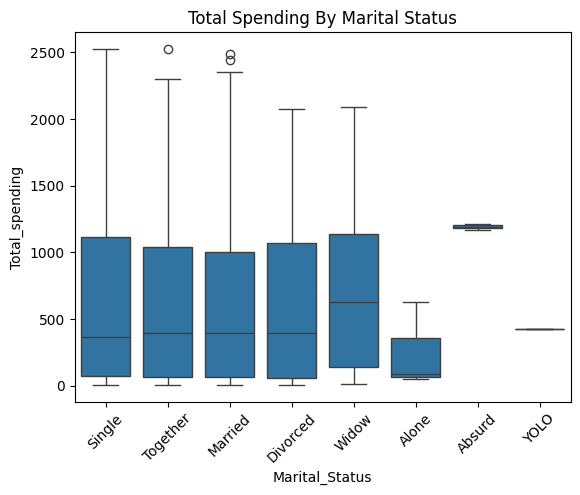

In [33]:
sns.boxplot(x="Marital_Status", y="Total_spending",data=data)
plt.xticks(rotation=45)
plt.title("Total Spending By Marital Status")
plt.show()

In [34]:
data.groupby("Marital_Status")["Total_spending"].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Absurd,2.0,1192.500000,33.234019,1169.0,1180.75,1192.5,1204.25,1216.0
Alone,3.0,256.666667,325.662914,49.0,69.00,89.0,360.50,632.0
Divorced,232.0,610.629310,580.628672,6.0,61.25,395.0,1073.00,2074.0
Married,857.0,591.464411,591.191468,8.0,68.00,396.0,1001.00,2486.0
Single,471.0,612.592357,631.292753,5.0,71.00,369.0,1118.50,2525.0
Together,573.0,608.846422,610.413855,8.0,69.00,395.0,1040.00,2524.0
Widow,76.0,727.960526,576.897760,15.0,138.00,625.5,1136.50,2088.0
YOLO,2.0,424.000000,0.000000,424.0,424.00,424.0,424.00,424.0


In [75]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_spending', 'Customer_Since'],
      dtype='object')

In [44]:
correlation_matrix=data[["Income", "Age", "Recency", "Total_spending", "NumWebPurchases", "NumStorePurchases"]].corr()
correlation_matrix

,Income,Age,Recency,Total_spending,NumWebPurchases,NumStorePurchases
Income,1.000000,0.161791,-0.003970,0.667576,0.387878,0.529362
Age,0.161791,1.000000,0.016295,0.113487,0.153051,0.127891
Recency,-0.003970,0.016295,1.000000,0.020066,-0.005641,-0.000434
Total_spending,0.667576,0.113487,0.020066,1.000000,0.528973,0.675181
NumWebPurchases,0.387878,0.153051,-0.005641,0.528973,1.000000,0.516240
NumStorePurchases,0.529362,0.127891,-0.000434,0.675181,0.516240,1.000000


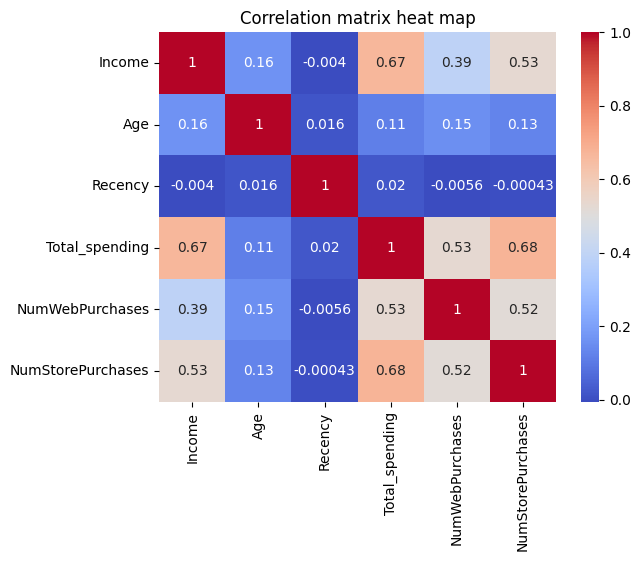

In [47]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation matrix heat map")
plt.show()

In [40]:
pivot_table_income=data.pivot_table(values="Income", index="Education", columns="Marital_Status", aggfunc="mean")

In [41]:
pivot_table_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


Text(0.5, 1.0, 'Average Inome By Education and Marital Status')

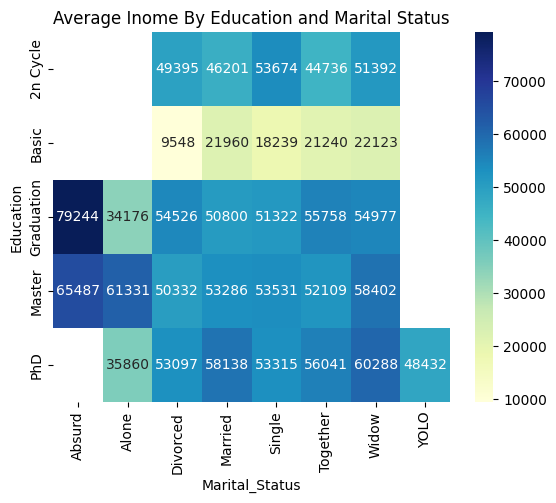

In [49]:
sns.heatmap(pivot_table_income, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Inome By Education and Marital Status")

In [55]:
group_Education=data.groupby("Education")["Total_spending"].mean()
group_Education.sort_values(ascending=False)

Education
PhD           676.733888
Graduation    621.686380
Master        609.767123
2n Cycle      494.930000
Basic          81.796296
Name: Total_spending, dtype: float64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2n Cycle'),
  Text(1, 0, 'Basic'),
  Text(2, 0, 'Graduation'),
  Text(3, 0, 'Master'),
  Text(4, 0, 'PhD')])

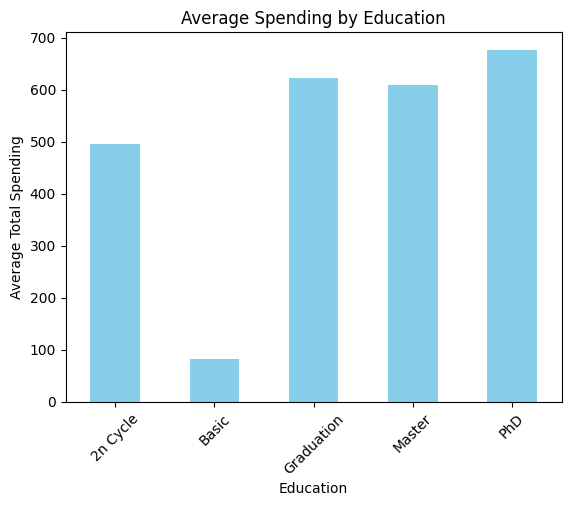

In [59]:
group_Education.plot(kind="bar", color="skyblue")
plt.title("Average Spending by Education")
plt.ylabel("Average Total Spending")
plt.xticks(rotation = 45)

In [62]:
data


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_spending,Customer_Since
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,68,0,1617,4890
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,71,2,27,4340
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,60,0,776,4539
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,41,1,53,4366
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,44,1,422,4388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,3,11,0,58,1,1341,4608
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,1,0,0,3,11,0,79,3,444,4246
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,3,11,0,44,0,1241,4382
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,3,11,0,69,1,843,4383


In [ ]:
data["AcceptedAny"]=data[["AcceptedCmp1", "AcceptedCmp2"]]